In [1]:
import os
import pandas as pd
%matplotlib inline
import nltk

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Initial imports
import os
from path import Path
import pandas as pd
from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

get_ipython().run_line_magic("matplotlib", "inline")

In [3]:
from newsapi import NewsApiClient

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jeneia/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [5]:
# Read your api key environment variable

api_key = os.getenv("NewsAPI")

In [6]:
type(api_key)

str

In [7]:
# Create a newsapi client

newsapi = NewsApiClient(api_key=api_key)

In [10]:
# Fetch the top Bitcoin news articles
bitcoin_news = newsapi.get_top_headlines(q="bitcoin", language="en", country="us")
bitcoin_news

{'status': 'ok', 'totalResults': 0, 'articles': []}

In [9]:
# Fetch all Bitcoin news articles
bitcoin_news_all = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")
bitcoin_news_all

{'status': 'ok',
 'totalResults': 4329,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Laura Mallonee',
   'title': 'Inside the Icelandic Facility Where Bitcoin Is Mined',
   'description': "Cryptocurrency mining now uses more of the Nordic island nation's electricity than its homes.",
   'url': 'https://www.wired.com/story/iceland-bitcoin-mining-gallery/',
   'urlToImage': 'https://media.wired.com/photos/5dbc37a4c955950008b26751/191:100/w_1280,c_limit/photo_barnard_explosions_4.jpg',
   'publishedAt': '2019-11-03T15:00:00Z',
   'content': 'Less than two miles from Icelands Reykjavik airport sits a nondescript metal building as monolithic and drab as a commercial poultry barn. Theres a deafening racket inside, too, but it doesnt come from clucking chickens. Instead, tens of thousands of whirring… [+3426 chars]'},
  {'source': {'id': None, 'name': 'Gizmodo.com'},
   'author': 'Jennings Brown',
   'title': 'French Students Will Now Have to Learn About Bitcoin',


In [11]:
# Fetch the top Ethereum news articles

ethereum_news = newsapi.get_top_headlines(q="ethereum", language="en", country="us")
ethereum_news

{'status': 'ok', 'totalResults': 0, 'articles': []}

In [13]:
# Fetch the Ethereum news articles

ethereum_news_all = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")
ethereum_news_all['articles'][0]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Mike Butcher',
 'title': 'Sharding, scalability, decentralization – You name it, we’ve got it on the EC stage in Berlin',
 'description': 'Sharding and scalability. Transactions per second. Crypto-ecosystems. The decentralized web. These are the voyages of the Starship Blockchain, on it’s 5-year mission to seek out… Ok, you get the drift! But as you can tell, there remain many, many issues to te…',
 'url': 'http://techcrunch.com/2019/11/20/sharding-scalability-decentralization-you-name-it-weve-got-it-on-the-ec-stage-in-berlin/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2019/11/drake-egan-tyler.jpg?w=711',
 'publishedAt': '2019-11-20T14:24:38Z',
 'content': 'Sharding and scalability. Transactions per second.\xa0\xa0Crypto-ecosystems. The\xa0decentralized web. These are the\xa0voyages of the Starship Blockchain, on its 5-year mission to seek out Ok, you get the drift! But as you can tell,\xa0there remain 

In [14]:
ethereum_news_all = newsapi.get_everything(q="Ethereum", language="en")
ethereum_news_all['totalResults']

932

In [17]:
# Create the Bitcoin sentiment scores DataFrame

# bitcoin_news_all = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")
# bitcoin_news_all

In [18]:
bitcoin_sentiments = []

for article in bitcoin_news_all["articles"]:
    try:
        text = article["content"]
        title = article["title"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        
        
        bitcoin_sentiments.append({
           
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Bitcoin title": title,
             "text": text,
            
        })
        
    except AttributeError:
        pass

In [20]:
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

In [21]:
cols = ["Compound", "Negative", "Neutral", "Positive", "Bitcoin title", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Bitcoin title,text
0,-0.1531,0.039,0.961,0.000,Inside the Icelandic Facility Where Bitcoin Is...,Less than two miles from Icelands Reykjavik ai...
1,0.0000,0.000,1.000,0.000,French Students Will Now Have to Learn About B...,High school students in France may be among th...
2,0.4404,0.000,0.941,0.059,Debunking Blockchain once and for all,TL;DR: The in-depth Complete Blockchain and Et...
3,0.5070,0.000,0.931,0.069,Satoshi Nakaboto: ‘Chinese congress passes ‘cr...,Our robot colleague Satoshi Nakaboto writes ab...
4,0.1725,0.052,0.882,0.066,Satoshi Nakaboto: ‘China will no longer crack ...,Our robot colleague Satoshi Nakaboto writes ab...


In [22]:
ethereum_sentiments = []

for article in ethereum_news_all["articles"]:
    try:
        text = article["content"]
        title = article['title']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        
        
        ethereum_sentiments.append({
           
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Ethereum title": title,
             "text": text,
            
        })
        
    except AttributeError:
        pass

In [25]:
# Create the ethereum sentiment scores DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Ethereum title", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,Ethereum title,text
0,0.3595,0.000,0.945,0.055,"Sharding, scalability, decentralization – You ...",Sharding and scalability. Transactions per sec...
1,0.4404,0.000,0.941,0.059,Debunking Blockchain once and for all,TL;DR: The in-depth Complete Blockchain and Et...
2,0.6249,0.000,0.900,0.100,Announcing the Disrupt Berlin 2019 agenda,Disrupt Berlin is right around the corner. And...
3,0.4601,0.000,0.915,0.085,"Ethereum had a less than stellar Q3, intense 6...","he plaBy now, you should almost certainly know..."
4,-0.3089,0.055,0.945,0.000,A Comprehensive Guide to Top Blockchain Platforms,Blockchain has been picking up the pace since ...


In [27]:
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.411868,0.007526,0.927737,0.064737
std,0.251583,0.018032,0.035938,0.035104
min,-0.153100,0.000000,0.857000,0.000000
25%,0.306450,0.000000,0.916500,0.066000
50%,0.507000,0.000000,0.932000,0.068000
75%,0.516850,0.000000,0.933000,0.070500
max,0.816600,0.052000,1.000000,0.143000


In [28]:
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.00000,20.000000,20.00000
mean,0.245435,0.01400,0.933400,0.05265
std,0.335688,0.02931,0.055309,0.04619
min,-0.440400,0.00000,0.738000,0.00000
25%,0.000000,0.00000,0.924750,0.00000
50%,0.327750,0.00000,0.944000,0.05350
75%,0.464250,0.00000,0.951750,0.07525
max,0.690800,0.09000,1.000000,0.17300


### Questions:

Q: Which coin had the highest mean positive score?

A: Both Bitcoin and Ethereum had positive mean scores, although Bitcoin's score is a bit higher.

Q: Which coin had the highest compound score?

A: Ethereum has the highest max compound score (0.69) vs (0.82) for Bitcoin.

Q. Which coin had the highest positive score?

A: Etherim has the highest max positive score (0.17) vs (0.14) for Bitcoin.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [46]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeneia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
# Expand the default stopwords list if necessary

sw_addon = {'who', 'what', 'where'}

In [50]:
# Complete the tokenizer function

def tokenizer(text):
    """Tokenizes text."""
    lemmatizer = WordNetLemmatizer()
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    sw = set(stopwords.words('english'))
    lem = [lemmatizer.lemmatize(word) for word in words]
    sw_addon = {'(',')',',','.','[',']',':',':'}
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    return tokens

In [55]:
# Create a new tokens column for bitcoin

bitcoin_tokens = bitcoin_df.copy()

In [56]:
tokenized = []
for i in bitcoin_tokens['text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens':tokenized_articles})

In [57]:
tokens_df= pd.DataFrame(tokenized)
bitcoin_tokens['tokens_text'] = tokens_df

In [58]:
tokenized = []
for i in bitcoin_tokens['Bitcoin title']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens title':tokenized_articles})

In [59]:
tokens_df= pd.DataFrame(tokenized)
bitcoin_tokens['tokens_title'] = tokens_df

In [60]:
bitcoin_tokens.head()

,Compound,Negative,Neutral,Positive,Bitcoin title,text,tokens_text,tokens_title
0,-0.1531,0.039,0.961,0.000,Inside the Icelandic Facility Where Bitcoin Is...,Less than two miles from Icelands Reykjavik ai...,"[less, two, mile, icelands, reykjavik, airport...","[inside, icelandic, facility, bitcoin, mined]"
1,0.0000,0.000,1.000,0.000,French Students Will Now Have to Learn About B...,High school students in France may be among th...,"[high, school, student, france, may, among, fi...","[french, students, learn, bitcoin]"
2,0.4404,0.000,0.941,0.059,Debunking Blockchain once and for all,TL;DR: The in-depth Complete Blockchain and Et...,"[tldr, indepth, complete, blockchain, ethereum...","[debunking, blockchain]"
3,0.5070,0.000,0.931,0.069,Satoshi Nakaboto: ‘Chinese congress passes ‘cr...,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ...","[satoshi, nakaboto, chinese, congress, pass, c..."
4,0.1725,0.052,0.882,0.066,Satoshi Nakaboto: ‘China will no longer crack ...,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ...","[satoshi, nakaboto, china, longer, crack, bitc..."


In [61]:
# Create a new tokens column for ethereum

ethereum_tokens = ethereum_df.copy()

In [62]:
tokenized_eth = []
for i in ethereum_tokens['text']:
    tokenized_articles = tokenizer(i)
    tokenized_eth.append({'tokens_text':tokenized_articles})

In [63]:
tokens_df_eth = pd.DataFrame(tokenized_eth)
ethereum_tokens['tokens_text'] = tokens_df_eth

In [64]:
tokenized_eth = []
for i in ethereum_tokens['Ethereum title']:
    tokenized_articles = tokenizer(i)
    tokenized_eth.append({'tokens_title':tokenized_articles})

In [65]:
tokens_df_eth = pd.DataFrame(tokenized_eth)
ethereum_tokens['tokens_title'] = tokens_df_eth

In [66]:
ethereum_tokens.head()

,Compound,Negative,Neutral,Positive,Ethereum title,text,tokens_text,tokens_title
0,0.3595,0.000,0.945,0.055,"Sharding, scalability, decentralization – You ...",Sharding and scalability. Transactions per sec...,"[sharding, scalability, transactions, per, sec...","[sharding, scalability, decentralization, name..."
1,0.4404,0.000,0.941,0.059,Debunking Blockchain once and for all,TL;DR: The in-depth Complete Blockchain and Et...,"[tldr, indepth, complete, blockchain, ethereum...","[debunking, blockchain]"
2,0.6249,0.000,0.900,0.100,Announcing the Disrupt Berlin 2019 agenda,Disrupt Berlin is right around the corner. And...,"[disrupt, berlin, right, around, corner, plent...","[announcing, disrupt, berlin, agenda]"
3,0.4601,0.000,0.915,0.085,"Ethereum had a less than stellar Q3, intense 6...","he plaBy now, you should almost certainly know...","[plaby, almost, certainly, know, ethereum, eth...","[ethereum, le, stellar, q, intense, month, ahe..."
4,-0.3089,0.055,0.945,0.000,A Comprehensive Guide to Top Blockchain Platforms,Blockchain has been picking up the pace since ...,"[blockchain, ha, picking, pace, since, incepti...","[comprehensive, guide, top, blockchain, platfo..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [67]:
from collections import Counter
from nltk import ngrams

In [68]:
# Generate the Bitcoin N-grams where N=2

all_bitcoin_words = []
for text in bitcoin_tokens['tokens_text']:
    for word in text:
        all_bitcoin_words.append(word)

In [69]:
bitcoin_sent = []
for sent in bitcoin_tokens['text']:
    sent_list = sent
    bitcoin_sent.append(sent_list)

In [84]:
def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['Bigram', 'Count'])

In [85]:
bigram_counter(bitcoin_sent)

,Bigram,Count
0,"(satoshi, nakaboto)",28
1,"(char, robot)",14
2,"(robot, colleague)",14
3,"(colleague, satoshi)",14
4,"(nakaboto, writes)",14
5,"(writes, bitcoin)",14
6,"(every, fucking)",14
7,"(fucking, daywelcome)",14
8,"(daywelcome, another)",14
9,"(another, edition)",14


In [72]:
# Generate the Ethereum N-grams where N=2

all_eth_words = []
for text in ethereum_tokens['tokens_text']:
    for word in text:
        all_eth_words.append(word)

In [73]:
eth_sent = []
for sent in ethereum_tokens['text']:
    sent_list_eth = sent
    eth_sent.append(sent_list_eth)

In [74]:
bigram_counter(eth_sent)

,Bigram,Count
0,"(complete, blockchain)",3
1,"(blockchain, ethereum)",3
2,"(ethereum, programmer)",3
3,"(programmer, bundle)",3
4,"(dark, mode)",3
5,"(sharding, scalability)",2
6,"(scalability, transactions)",2
7,"(transactions, per)",2
8,"(per, secondcryptoecosystems)",2
9,"(secondcryptoecosystems, thedecentralized)",2


In [75]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    Counter_words = dict(Counter(tokens).most_common(N))
    return Counter(tokens).most_common(N)

In [77]:
# Get the top 10 words for Bitcoin

token_count(all_bitcoin_words)

[('bitcoin', 46),
 ('satoshi', 28),
 ('nakaboto', 28),
 ('char', 19),
 ('robot', 14),
 ('colleague', 14),
 ('writes', 14),
 ('every', 14),
 ('fucking', 14),
 ('daywelcome', 14)]

In [78]:
# Get the top 10 words for Ethereum

token_count(all_eth_words)

[('char', 20),
 ('cryptocurrency', 11),
 ('blockchain', 8),
 ('ha', 8),
 ('xrp', 7),
 ('many', 5),
 ('ethereum', 5),
 ('bitcoin', 5),
 ('bank', 5),
 ('year', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [91]:
pip install wordcloud

     |████████████████████████████████| 163kB 2.1MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [92]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [15.0, 10.0]

In [93]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/jeneia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

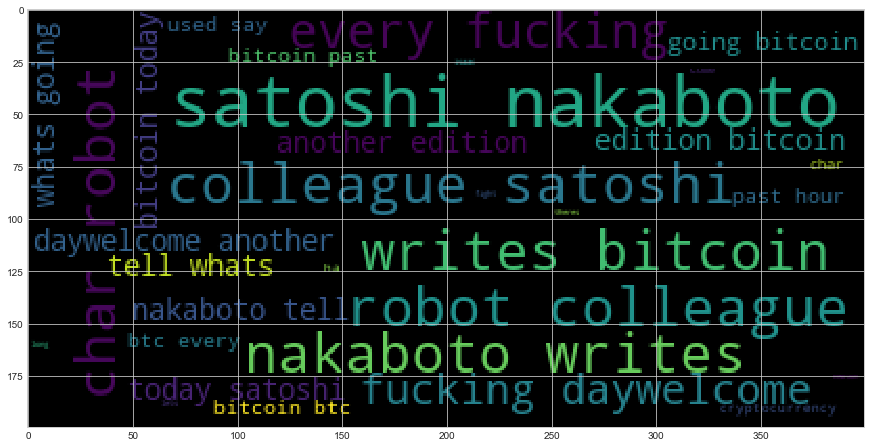

In [95]:
# Generate the Bitcoin word cloud

wc_bitcoin = WordCloud().generate(' '.join(all_bitcoin_words))
plt.imshow(wc_bitcoin)

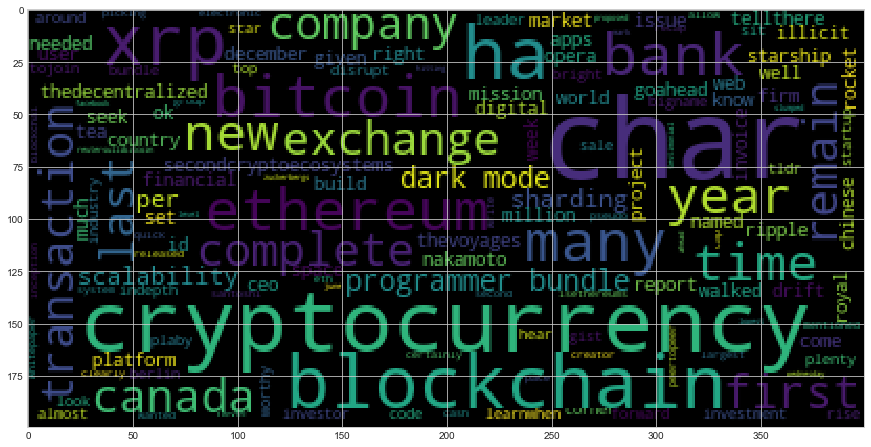

In [96]:
# Generate the Ethereum word cloud

wc_ethereum = WordCloud().generate(' '.join(all_eth_words))
plt.imshow(wc_ethereum)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [97]:
import spacy
from spacy import displacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [98]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0MB 14.5MB/s eta 0:00:01
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-cp37-none-any.whl size=12011740 sha256=72b915c8ec02de61556d0af4a3bec5335c0ab60ac6fdaae265c72e5624deacd4
  Stored in directory: /private/var/folders/0l/qb7snvpx1vbb_61qcrnc45tc0000gn/T/pip-ephem-wheel-cache-kb2ra_iu/wheels/6a/47/fb/6b5a0b8906d8e8779246c67d4658fd8a544d4a03a75520197a
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.2.0
    Uninstalling en-core-web-sm-2.2.0:
      Successfully uninstalled en-core-web-sm-2.2.0
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [99]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [103]:
# Concatenate all of the bitcoin text together

bitcoin_sent = []
for sent in bitcoin_tokens['text']:
    sent_list = sent
    bitcoin_sent.append(sent_list)
    
big_string_bitcoin = ' '.join(bitcoin_sent)
big_string_bitcoin

"Less than two miles from Icelands Reykjavik airport sits a nondescript metal building as monolithic and drab as a commercial poultry barn. Theres a deafening racket inside, too, but it doesnt come from clucking chickens. Instead, tens of thousands of whirring… [+3426 chars] High school students in France may be among the first people in the world to actually understand how cryptocurrency works. \r\nThe Next Web reports that the French education ministry, Le Ministère de lÉducation Nationale, will integrate cryptocurrency into its … [+1439 chars] TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20.\r\nWhen it comes to Bitcoin, you get the gist: Cryptocurrency is on the rise right now, it's a worthy investment, and it when it comes to top… [+1491 chars] Our robot colleague Satoshi Nakaboto writes about Bitcoin every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats bee

In [104]:
# Run the NER processor on all of the text

# Add a title to the document

bitcoin_doc = nlp(big_string_bitcoin)
bitcoin_doc.user_data['title'] = 'Bitcoin Named Entity Recognition'
displacy.render(bitcoin_doc, style='ent')

In [106]:
# List all Entities

for ent in bitcoin_doc.ents:
    print (ent, ent.label_)

Less than two miles QUANTITY
Icelands Reykjavik FAC
tens of thousands CARDINAL
France GPE
first ORDINAL
French NORP
Le Ministère de lÉducation Nationale ORG
Complete Blockchain and Ethereum Programmer ORG
just $24 MONEY
20LEARN20 CARDINAL
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Baudriallard PERSON
only one CARDINAL
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Machiavelli PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Nietzsche PERSON
Time ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Isaac Newton PERSON
Jack Dorsey PERSON
Bitcoin GPE
Ghana GPE
just weeks DATE
Dorsey PERSON
Bitcoin GPE
Africa LOC
Nigeria GPE
Ghana GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE

---

## Ethereum NER

In [107]:
# Concatenate all of the Ethereum text together

eth_sent = []
for sent in ethereum_tokens['text']:
    sent_list_eth = sent
    eth_sent.append(sent_list_eth)
    
big_string_eth = " ".join(eth_sent)
big_string_eth

"Sharding and scalability. Transactions per second.\xa0\xa0Crypto-ecosystems. The\xa0decentralized web. These are the\xa0voyages of the Starship Blockchain, on its 5-year mission to seek out Ok, you get the drift! But as you can tell,\xa0there remain many, many issues to tea… [+3851 chars] TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20.\r\nWhen it comes to Bitcoin, you get the gist: Cryptocurrency is on the rise right now, it's a worthy investment, and it when it comes to top… [+1491 chars] Disrupt Berlin is right around the corner. And there is plenty to look forward to.\r\nJoin us December 11 and December 12 to hear from industry leaders, investors, and bright stars in the startup world. We’ll sit down with CEOs from big-name companies such as A… [+14834 chars] he plaBy now, you should almost certainly know about Ethereum, ETH the second largest cryptocurrency by market cap. But if you needed a quick recap, here 

In [108]:
# Run the NER processor on all of the text

# Add a title to the document

eth_doc = nlp(big_string_eth)
eth_doc.user_data['title'] = 'Ethereum Named Entity Recogition'
displacy.render(eth_doc, style='ent')

In [109]:
# List all Entities

for ent in eth_doc.ents:
    print (ent, ent.label_)

second ORDINAL
the Starship Blockchain LOC
Complete Blockchain PERSON
Ethereum Programmer ORG
just $24 MONEY
20LEARN20 CARDINAL
Bitcoin GPE
Disrupt Berlin PERSON
December 11 and December 12 DATE
ETH ORG
second ORDINAL
Blockchain GPE
the year 2009 DATE
Santoshi Nakamoto PERSON
Nakamoto ORG
Bitcoin PERSON
Blockchai GPE
+9390 ORG
Reuters
 ORG
Bitcoin PERSON
as much as 9% PERCENT
Wednesday DATE
June DATE
Facebook ORG
Mark Zuckerberg's PERSON
Libra GPE
Zuckerberg PERSON
Swiss NORP
Swiss NORP
Block PERSON
$400 million MONEY
Ripple XRP PERSON
XRP ORG
Ponzi PERSON
XRP ORG
London GPE
less than 0.2 percent PERCENT
XRP ORG
The Royal Bank of Canada ORG
Last week DATE
Canadian NORP
The Logic WORK_OF_ART
The Royal Bank of Canada ORG
Opera PERSON
one CARDINAL
Opera Mobile ORG
the day DATE
six CARDINAL
Ripple XRP PERSON
XRP ORG
Bitcoin GPE
XRP PERSON
third ORDINAL
Blockchain GPE
Bitcoin GPE
the Complete Blockchain and Ethereum Programmer Bundle ORG
just $29 MONEY
Bejing ORG
first ORDINAL
public last w